# 1. Introduction

## Guidelines
Please complete the assignment inside this notebook. Make sure the code can be executed easily.

- Write production-ready code using OOP when relevant.
- For question 1, create simple unit tests for your code where applicable.
- For question 1, add comments and documentation strings for all methods. 
- For question 2 and 3, discuss your design choices.
- For question 2 and 3, discuss the complexity (Big O notation) of your solutions, both memory wise and performance wise.
- For question3, provide map visualization when relevant
- Try to stick to the most popular scientific Python libraries.

## Input data
You should have received three csv files. Each csv-file represents the locations where a person was stationary for a certain amount of time. 
The csv-files contain the following fields:

- Latitude: The latitude of the detected GPS coordinates Longitude: The longitude of the detected GPS coordinates
- Timestamp: The start time of the stationary in the following format:
    - YYYY = year
    - MM = month of year
    - dd = day of month
    - HH=hourofday
    - mm = minute of hour
    - Z = timezone offset
- Duration: The length of time the person was stationary (in milliseconds)
    
All questions in this assignment are related to this data.

In [1]:
# import statements go here.
import sys
import datetime
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from custom_modules_vb import vb_utils
from custom_modules_vb import colors as C
from custom_modules_vb import ecdf as E
from custom_modules_vb import ml as M

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# 2. Programming skills

## Question 1: Data parsing
- Create the code needed to read and parse the data.
- Print out some summary statistics of the data
    - e.g. Average number of places visited per day
    - e.g. Median distance traveled between two subsequent stationary locations
    - ...

------------------------------> SEARCHING AND READING DATA
Searching for datasets in project directory: C:\Users\Vytautas.Bielinskas\Documents\Junior Data Scientist\custom_modules_vb\solution_vb_20190823
Found files: ['Copy of Copy of person.1.csv', 'Copy of Copy of person.2.csv', 'Copy of Copy of person.3.csv']
Number of found files: 3.
Directory changed to: C:\Users\Vytautas.Bielinskas\Documents\Junior Data Scientist\custom_modules_vb\solution_vb_20190823\data

| Reading: Copy of Copy of person.1.csv
|| File with shape of (549, 5) is appended to the main list.
    latitude  longitude start_time(YYYYMMddHHmmZ)  duration(ms)  Person
0 -49.326958  -72.89073         201312251147-0300       1186491       0
1 -49.326930  -72.89073         201312251213-0300       4393711       0
2 -49.316610  -72.89890         201312251358-0300        842939       0



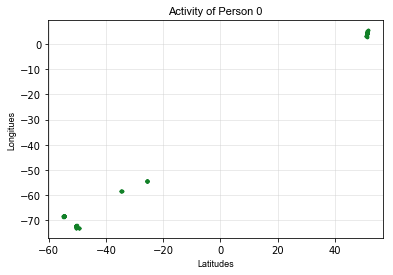

| Reading: Copy of Copy of person.2.csv
|| File with shape of (763, 5) is appended to the main list.
    latitude  longitude start_time(YYYYMMddHHmmZ)  duration(ms)  Person
0  51.057022   3.714476         201312250036+0100      19593588       1
1  51.056984   3.714681         201312250608+0100      30460679       1
2  51.038406   3.729655         201312251451+0100        964169       1



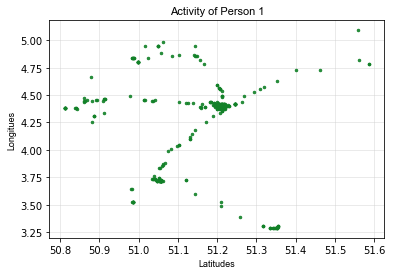

| Reading: Copy of Copy of person.3.csv
|| File with shape of (357, 5) is appended to the main list.
    latitude  longitude start_time(YYYYMMddHHmmZ)  duration(ms)  Person
0  51.216340   4.394143         201401061340+0100       9488434       2
1  51.205994   4.392227         201401061631+0100        430394       2
2  51.054200   4.447165         201401061643+0100        487049       2



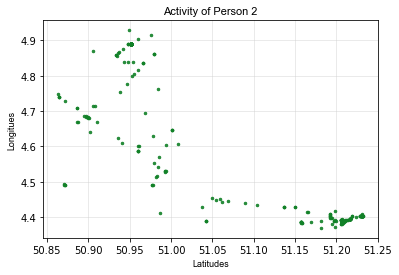

All datasets connected into single one DataFrame with shape of (1669, 5).


In [2]:
# ****************  MY SOLUTION TO Q1 **************** #

# Set system constants
FORMAT = 'CSV'    # A file format that data is stored as.
C_PARSING = 'start_time(YYYYMMddHHmmZ)'
C_DURATION = 'duration(ms)'
DIST_RATIO = 1.29 / 0.013184460701897903 # (based on natural measurements on Google Maps)

# PLAN OF ATTACK!
# Step 01: Reading Data
data = vb_utils.find_datasets(FORMAT)

In [3]:
# Step 02: Parse Data
data = vb_utils.parse_timestamp(data, C_PARSING, C_DURATION)
data.head()

------------------------------> PARSING DATA


,latitude,longitude,duration(ms),Person,YEAR,MONTH,DAY,HH,mm,OFFSET,Departure
0,-49.326958,-72.89073,1186491,0,2013,12,25,11,47,-3,2013-12-25 08:47:00
1,-49.326930,-72.89073,4393711,0,2013,12,25,12,13,-3,2013-12-25 09:13:00
2,-49.316610,-72.89890,842939,0,2013,12,25,13,58,-3,2013-12-25 10:58:00
3,-49.327160,-72.89072,211887,0,2013,12,25,14,40,-3,2013-12-25 11:40:00
4,-49.326880,-72.89085,71166228,0,2013,12,25,16,31,-3,2013-12-25 13:31:00


In [4]:
# Result for Q1: Average number of places visited per day
parse_data_by_day = vb_utils.aggregate_by_day_per_user(data)
vb_utils.calculate_avg_places(parse_data_by_day)

| Person 0 = 6.949 visited places per day.
| Person 1 = 8.573 visited places per day.
| Person 2 = 6.491 visited places per day.


Median distances between two subsequent stationary locations for all active period are:
| User 0 = 0.661 km
| User 1 = 0.752 km
| User 2 = 7.684 km


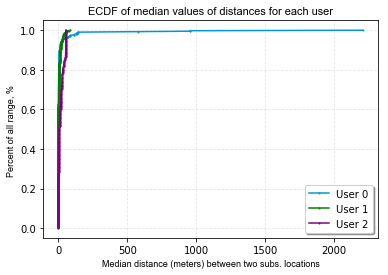

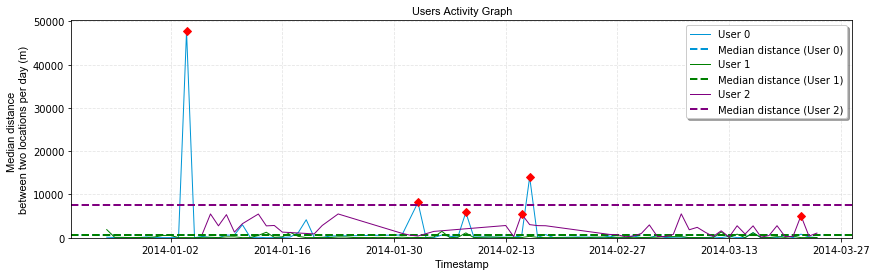

In [5]:
# Result for Q2: Median distance traveled between two subsequent stationary locations
# (For each person)
users_travels, median_distances = vb_utils.calculate_median_sub_distances(data, DIST_RATIO)
if users_travels != None:
    vb_utils.plot_activity(users_travels, median_distances, C.colors_for_plotting())

## Question 2: Data lookup
Create a method that generates a lookup table allowing us to effiently check whether or not a user has ever visited a location even if the new location is not exactly the same as the visited location (some noise is added to the longitude/latitude pairs).

<p><b>Sorry, I didn't solve this part of task yet. I quickly jumped to Q3 where Machine Learning take a role. For Q2 I would create an algorithm and implement it in one day. If you want to get this part, just let me know.</b></p>

## Question 3: Home and work detection
The goal of this question, is to design an algorithm that allows us to distinguish the likely home locations of a user from his likely work locations.

Note that a person might have multiple home and work locations, or might not have a work location at all. Also note that the data might be noise, incorrect and/or incomplete.

Discuss your choice of algorithms, rules, methods, distance measures, etc.

<p>-- <b>Q3 Explanation: Idea is to perform following steps:</b><br>
       #1. Generate slusters of locations for each person.<br>
       #2. Check how many travels occured in each class for specified person.
           If number of travels is less than defined threshold, remove that 
           class assuming that this class in meaningless, random, or incorrect.<br>
       #3. Zoom in to each class per user subset to detect where the user.
    starts day's travels (<code>HOME</code>), where stays major part of day (<code>WORK</code>) 
    and where come backat evenings (<code>HOME</code>).</p>
    
<p>All variables definitions and comments are provided in module files: <code>colors.py</code>, <code>ecdf.py</code>, <code>ml.py</code> and <code>vb_utils</code>.<p>

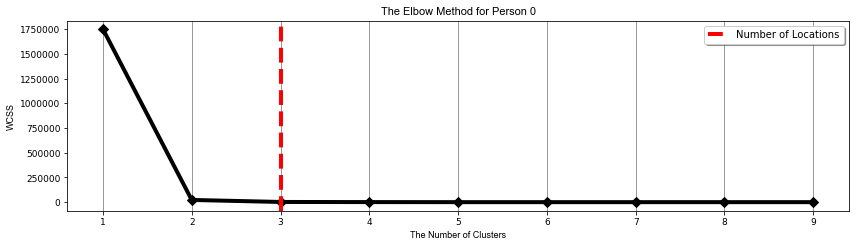

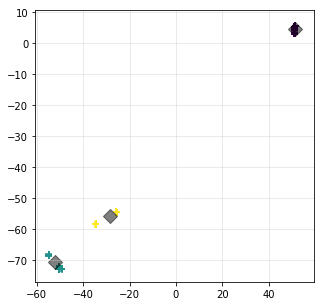

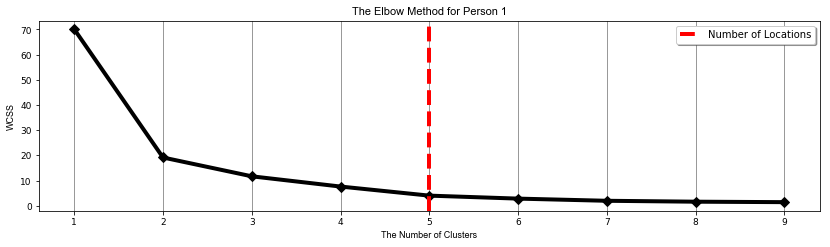

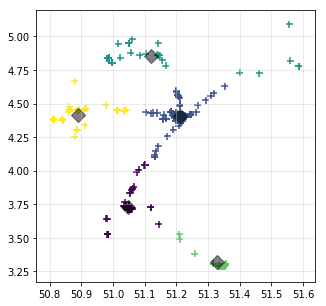

(!) REMOVED meaningless/random/incorrect class = 3


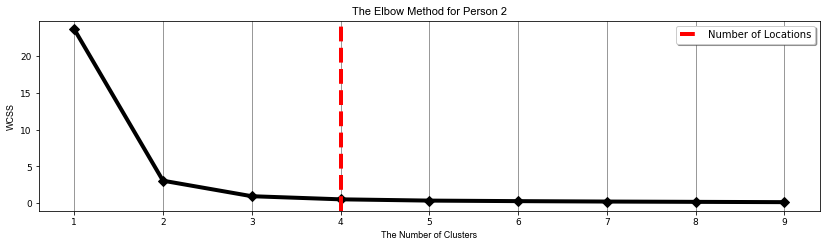

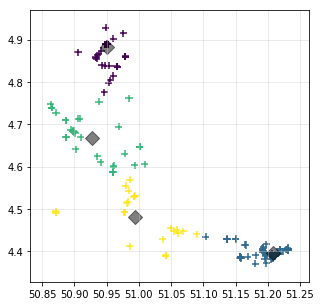

In [6]:
# Get number of persons
n_persons = len(data['Person'].unique())

list_persons_classes = []    # For storing clustered data in a list

for this_person in range(0, n_persons):
    data_person_classes = M.find_number_of_clusters(data[data['Person']==this_person])
    list_persons_classes.append(data_person_classes)

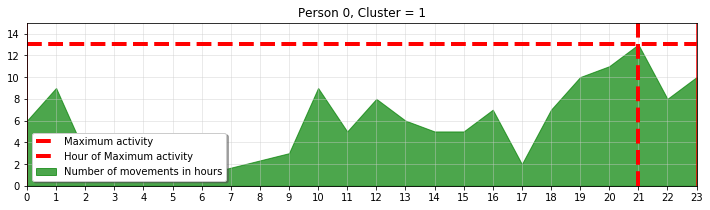

This location (Cluster 0) for Person 1 is HOME


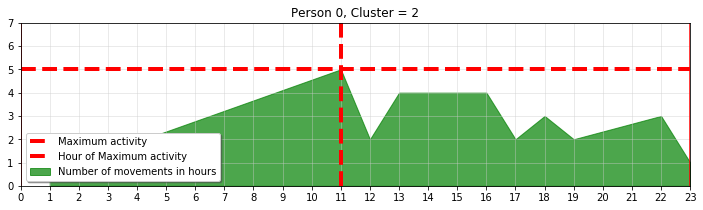

This location (Cluster 0) for Person 2 is WORK


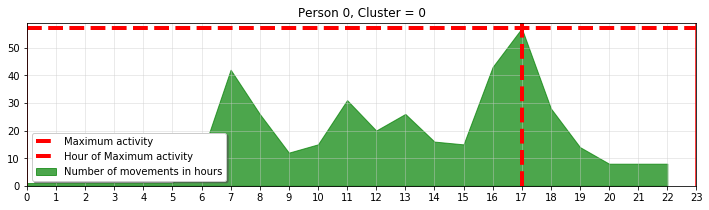

This location (Cluster 0) for Person 0 is WORK


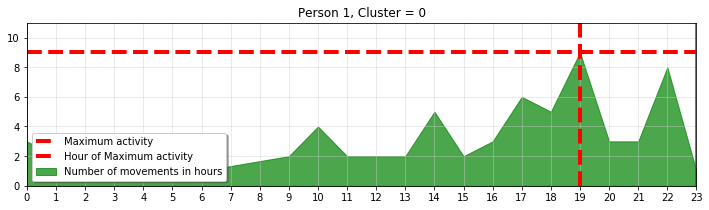

This location (Cluster 1) for Person 0 is HOME


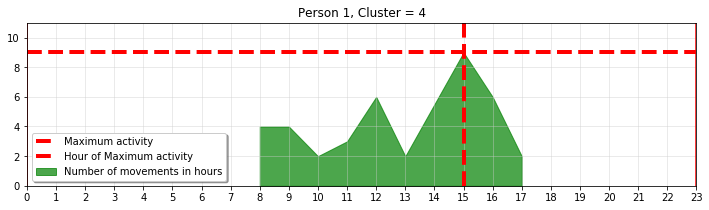

This location (Cluster 1) for Person 4 is WORK


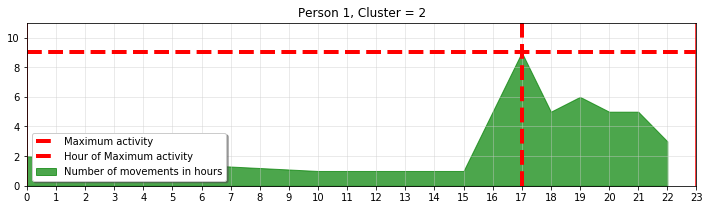

This location (Cluster 1) for Person 2 is WORK


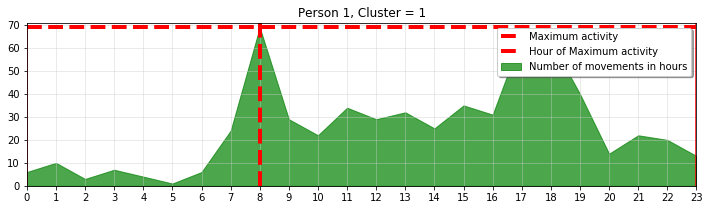

This location (Cluster 1) for Person 1 is HOME


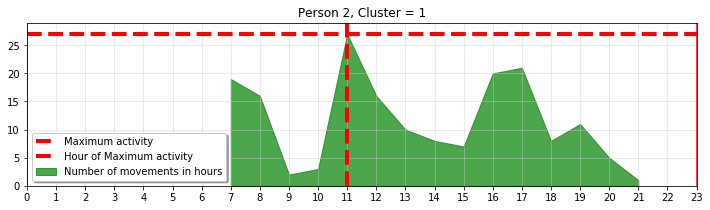

This location (Cluster 2) for Person 1 is WORK


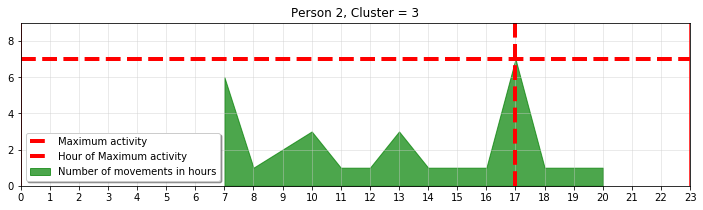

This location (Cluster 2) for Person 3 is WORK


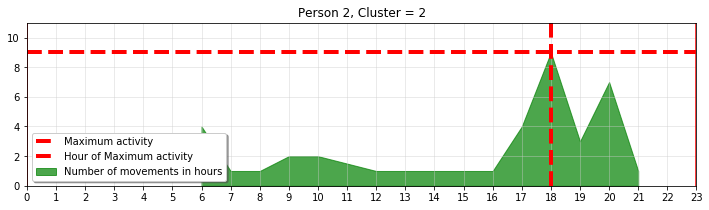

This location (Cluster 2) for Person 2 is WORK


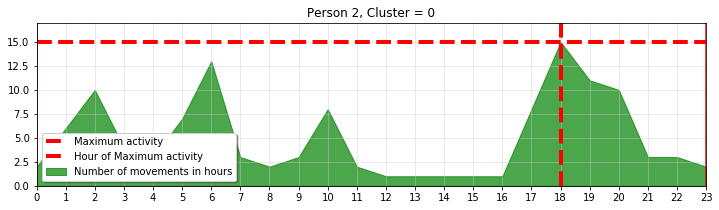

This location (Cluster 2) for Person 0 is WORK


In [7]:
# Identification of HOME and WORK locations
'''
Let's assume that a normal person wake-up early in the morning at home, 
then go to work location, spend there multiple hours and come back at
evening back to home location. I will check for such pattern right now!
'''

for i, this_user_data in enumerate(list_persons_classes):
    M.identify_locations(i, this_user_data)

<p>Thank you for the technical assigment. I coded it with big pleasure and it would be nice to discuss about such algorithms and more efficiency ways to perform the task and relavent topics face to face. Many spots in my solution can be improved considering <b>Big O</b> domain and use the <i>Classes</i>. Current version of the solution is a project designed mainly for analysis purposes.</p>
<p>Wishes! - Vytautas Bielinskas<br>+37063885452,<br>https://www.linkedin.com/in/bielinskas/,<br> https://www.youtube.com/c/VytautasBielinskas</p>

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from collections import Counter

In [15]:
X = data[['latitude', 'longitude']]
X = StandardScaler().fit_transform(X)

In [81]:
dbscan = DBSCAN(eps=0.005, min_samples=50)

model = dbscan.fit(X)

In [82]:
labels = model.labels_

In [83]:
core_samples = np.zeros_like(labels, dtype=bool)

core_samples[dbscan.core_sample_indices_] = True
print(core_samples)

[False False False ... False  True  True]


In [84]:
# Calculating the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

4

In [85]:
# Silhouette score
print('Shilhouette Coefficient: {}'.format(metrics.silhouette_score(X, labels)))

Shilhouette Coefficient: 0.6860065651820706


In [86]:
outliers_df = pd.DataFrame(X)

print(Counter(model.labels_))
#print(outliers_df(model.labels_==-1))

Counter({2: 1209, -1: 174, 3: 174, 0: 58, 1: 54})


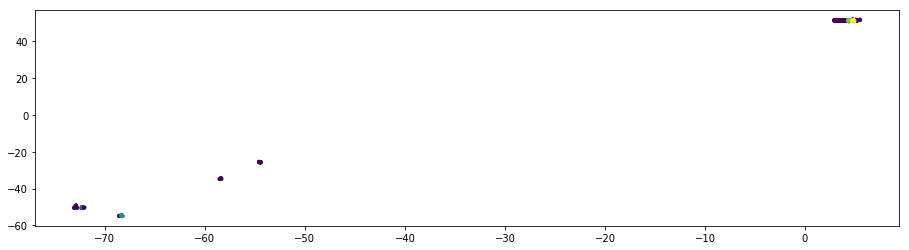

In [87]:
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_
ax.scatter(data['longitude'], data['latitude'], c=colors, s=10)

In [89]:
X[:, 1]

array([-3.24525806, -3.24525806, -3.24563595, ...,  0.34277906,
        0.34840828,  0.35235783])

In [ ]:
data[['']]